# Cycle 1 - Introduction to neural networks exercices

## Rodolphe Cledassou school 2023

> Alexandre Boucaud and Marc Huertas-Company

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

import seaborn
import matplotlib.pyplot as plt

tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

seaborn.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, rc={"lines.linewidth": 2})

## Let's first generate some data...

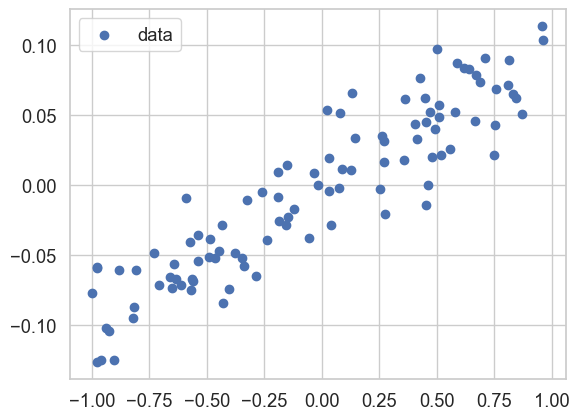

In [2]:
x = np.random.uniform(-1, 1, 100)
y = 0.1 * x + np.random.normal(0, 0.025, 100)
plt.scatter(x, y, label="data")
plt.legend()
plt.show()

## The standard way to deal with this, is through linear regression

In [3]:
# linear regression is the same as polynomial fitting of degree 1

res = np.polyfit(x, y, 1)

print(res)

[ 0.09568503 -0.0014758 ]


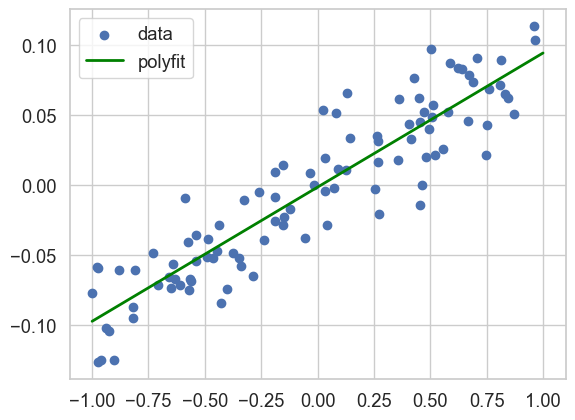

In [4]:
x_plot = np.linspace(-1, 1)

plt.scatter(x, y, label="data")
plt.plot(
    x_plot,
    x_plot * res[0] + res[1],
    color="green",
    label="polyfit",
)
plt.legend()
plt.show()

## Now, let's try to write the linear regression in a different way (more complicated way)

In [5]:
ann = tfk.Sequential([
    tfkl.Dense(1, input_dim=1, activation=None)
])

The Dense command here, onnly says that the input is multiplied by a parameter $w$. We are effectively writing a simple model for our data: $y = w.a+b$, where $w$ is unknown.
![alt](https://drive.google.com/uc?id=1Rt2bNPCxaHXdjzmVS7TCw_u_Ur-WIqlW)

We can visualize the model we just created.

In [6]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### We then compile

In [7]:
ann.compile(optimizer=tf.optimizers.Adam(), loss="mse")

We are simply tht we want to minimize the mean square error (mse) between input and output. We call this the "loss function". So we are looking for the value of $w$ that minimizes the following expression: $$\sum_i(y_i-w.x_i)^2$$

### And fit the model ...

In [8]:
# you might need to run this cell a couple of times if it does not work directly
history = ann.fit(x, y, batch_size=1, epochs=50, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

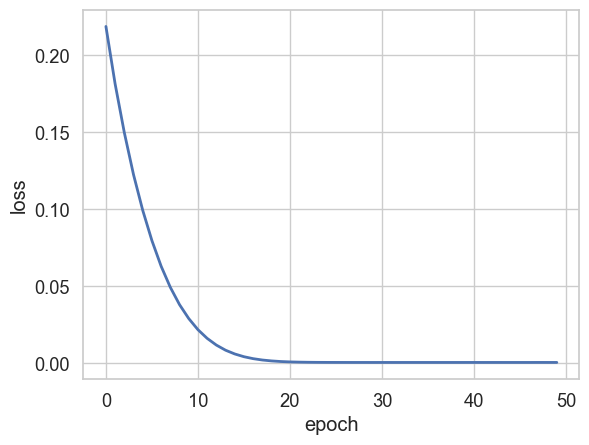

In [9]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

### Let's see what we got here...

2/2 [==============================] - 0s 953us/step


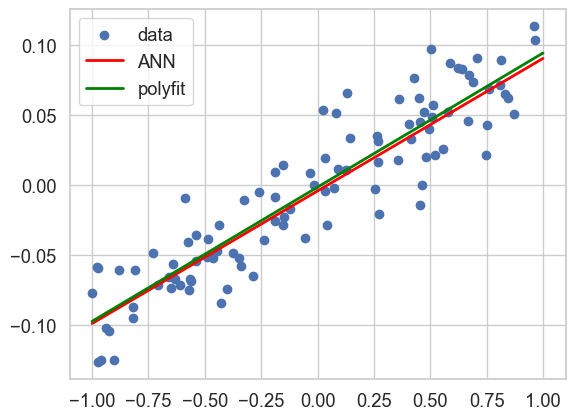

In [10]:
plt.scatter(x, y, label="data")
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
plt.plot(
    x_plot,
    x_plot * res[0] + res[1],
    color="green",
    label="polyfit",
)
plt.legend()

We have performed a linear regression with and artifical neural network ! So, yes, linear regression IS also Machine Learning...

### Why is this useful ?

Let's suppose we have a more complex dataset...

In [11]:
x = np.random.uniform(-1, 1, 100)
model = lambda x: 0.1 * x + np.sin(5 * x)
y = model(x) + np.random.normal(0, 0.45 * np.abs(x), 100)

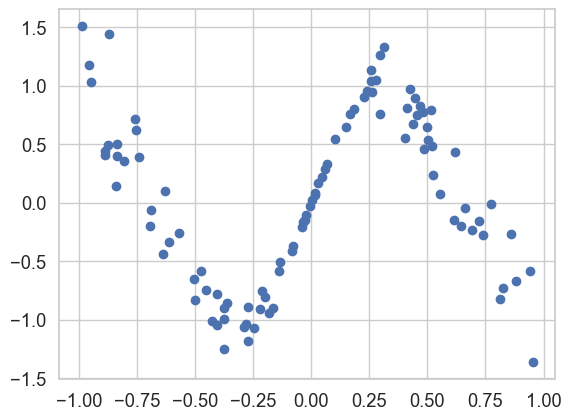

In [12]:
plt.scatter(x, y)
plt.show()

## We can try again simple polynomial regression ...

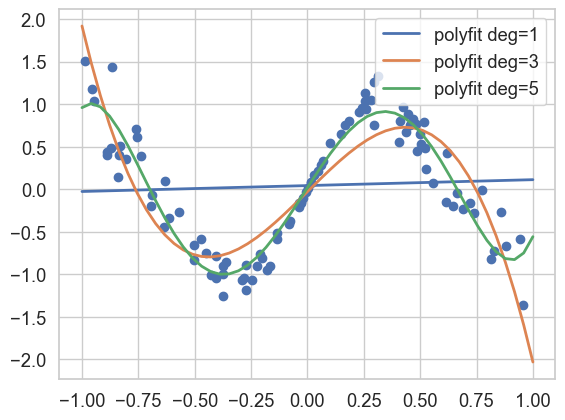

In [13]:
poly = [
    (deg, np.polyfit(x, y, deg))
    for deg in [1, 3, 5]
]

plt.scatter(x, y)
for deg, res in poly:
    plt.plot(
        x_plot,
        np.polyval(res, x_plot),
        label=f"polyfit {deg=}",
    )
plt.legend()
plt.show()

but that will not work super well as expected...

# Let's go back to our network...

In [14]:
ann = tfk.Sequential([
    tfkl.Dense(1, input_dim=1, activation=None)
])
ann.compile(optimizer='adam', loss="mse")
ann.fit(x, y, batch_size=1, epochs=50, verbose=0)

2/2 [==============================] - 0s 1ms/step


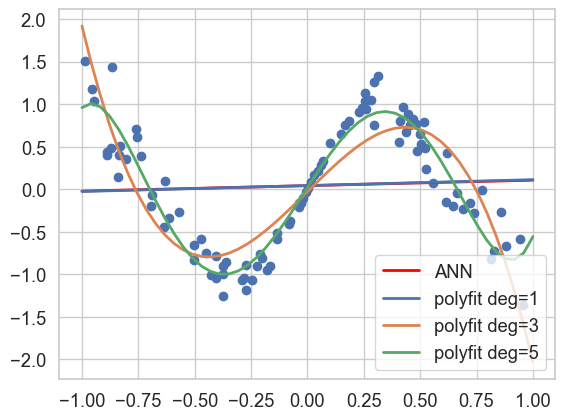

In [15]:
plt.scatter(x, y)
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
for deg, res in poly:
    plt.plot(
        x_plot,
        np.polyval(res, x_plot),
        label=f"polyfit {deg=}",
    )
plt.legend()

If I do not change anything, I will obtain the same result. My model is simply linear...

## and add a bit of non-linearity ...

In [16]:
ann = tfk.Sequential([tfkl.Dense(1, input_dim=1, activation="sigmoid")])

The sigmoid function is given by this expression: $$ \frac{1}{1+e^{-x}}$$
So our model is now like this:![alt](https://drive.google.com/uc?id=1-2VbatzRnqGJMKCga-tppiTo6iPRBr9s)
This is what we call a perceptron. The non-linear function added after the linear combination is also called the activation function, because "it fires the unit".

In [17]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
ann.compile(optimizer="adam", loss="mse")
history = ann.fit(x, y, batch_size=1, epochs=100, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

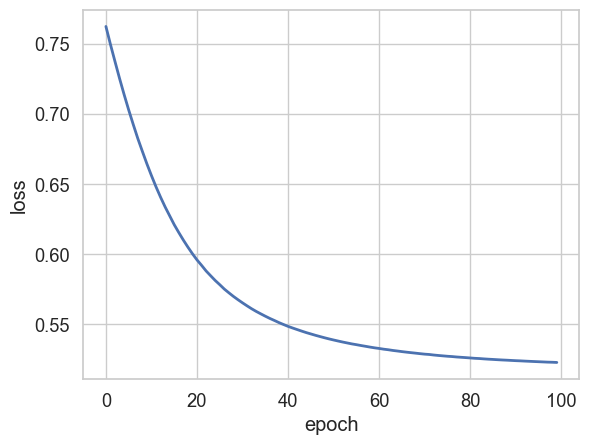

In [19]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

2/2 [==============================] - 0s 1ms/step


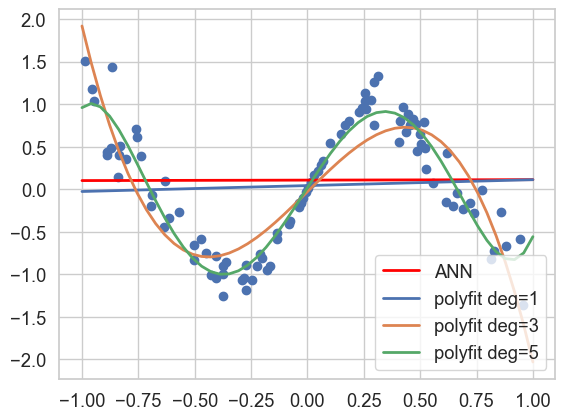

In [20]:
plt.scatter(x, y)
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
for deg, res in poly:
    plt.plot(
        x_plot,
        np.polyval(res, x_plot),
        label=f"polyfit {deg=}",
    )
plt.legend()

Still not great, but there is some potential !?

## We can add another layer

In [21]:
ann = tfk.Sequential(
    [
        tfkl.Dense(1, input_dim=1, activation="sigmoid"),
        tfkl.Dense(1, activation=None),
    ]
)

We have added "a layer". Our model is now: $$ y=(\frac{1}{1+e^{-(w_1.x)}}).w_2$$
![alt](https://drive.google.com/uc?id=1E0iobni7jhUI2jfGKPb081OM_QDB5Hjg)

In [22]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
ann.compile(optimizer="adam", loss="mse")
history = ann.fit(x, y, batch_size=1, epochs=50, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

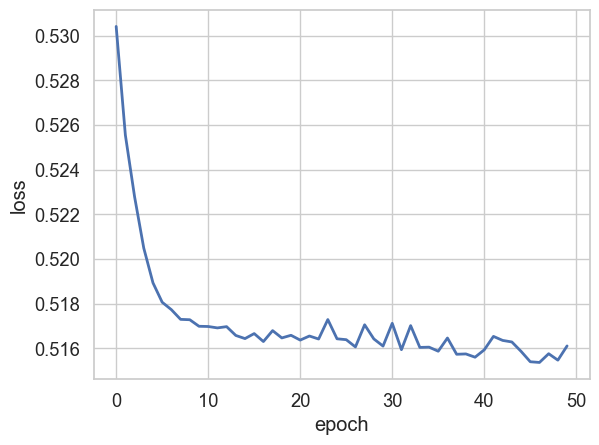

In [24]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

2/2 [==============================] - 0s 1ms/step


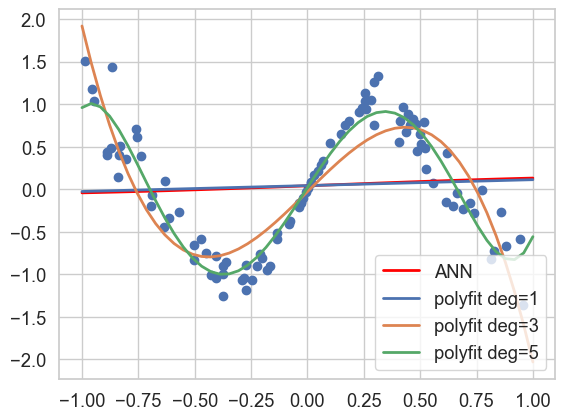

In [25]:
plt.scatter(x, y)
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
for deg, res in poly:
    plt.plot(
        x_plot,
        np.polyval(res, x_plot),
        label=f"polyfit {deg=}",
    )
plt.legend()

Not fantastic, but you get the idea...You have just created your first ANN for regression!

In fact, it turns out that it exists a mathematical theorem that proves that NNs are optimal approximators:


> _For any continuous function for a hypercube [0,1]d to real numbers, and every positive epsilon, there exists a sigmoid based 1-hidden layer neural network that obtaines at most epsilon error in functional space_  
> Cybenko+89

> _Big enough network can approximate, but not represent any smooth function. the math demonstration implies showing that networs are dense in the space of target functions_

So, the approximation theorem tells me that there exists a NN that can approximate any function. It does not tell me which one: this is the alchemia of ML. It does not tell me how to minimize it either!

## Let's make the model more complex

In [26]:
ann = tfk.Sequential([
        tfkl.Dense(30, input_dim=1, activation="relu"),
        tfkl.Dense(20, activation="relu"),
        tfkl.Dense(10, activation="relu"),
        tfkl.Dense(5, activation="relu"),
        tfkl.Dense(1, activation=None),
])
ann.compile(optimizer="adam", loss="mse")
history = ann.fit(x, y, batch_size=1, epochs=50, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

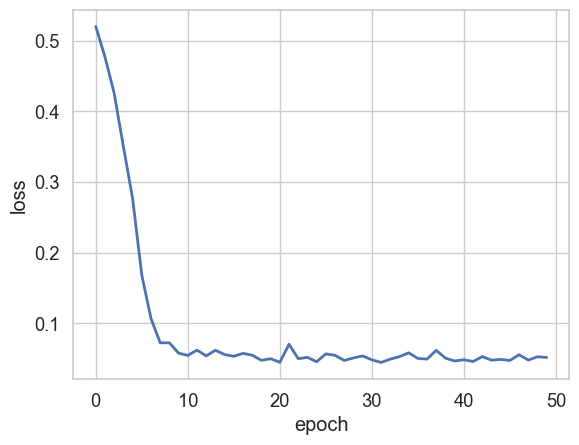

In [27]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

2/2 [==============================] - 0s 771us/step


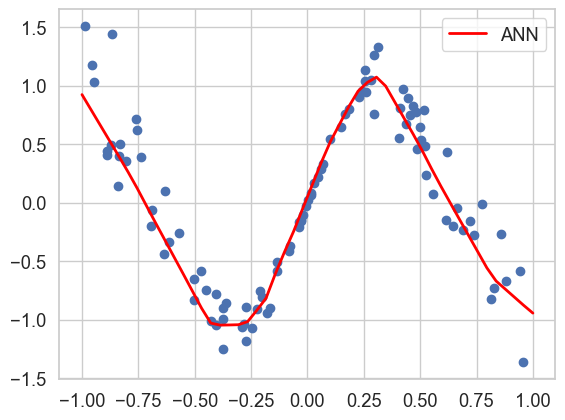

In [28]:
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
plt.scatter(x, y)
plt.legend()

Which is not that far from the real underlying model...

2/2 [==============================] - 0s 1ms/step


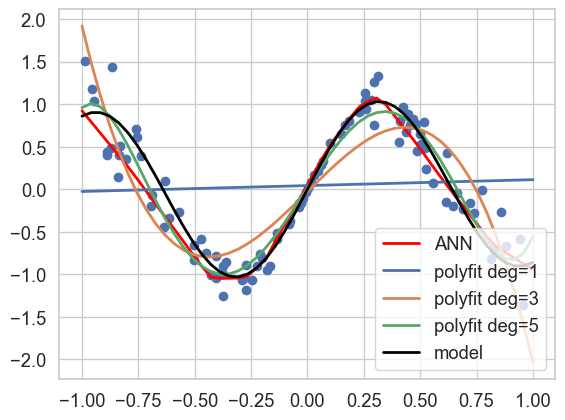

In [29]:
plt.plot(x_plot, ann.predict(x_plot), color="red", label="ANN")
for deg, res in poly:
    plt.plot(x_plot, np.polyval(res, x_plot), label=f"polyfit {deg=}")
plt.plot(x_plot, model(x_plot), label="model", color="black")
plt.scatter(x, y)
plt.legend()

2/2 [==============================] - 0s 1ms/step


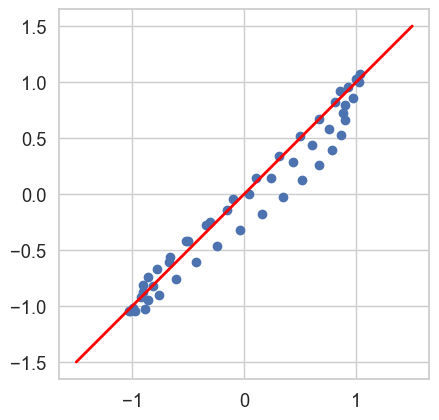

In [30]:
y_predict = ann.predict(x_plot)
plt.plot([-1.5, 1.5], [-1.5, 1.5], color="red")
plt.scatter(model(x_plot), y_predict)
plt.gca().set_aspect('equal', adjustable='box')

### What if I go beyond my training set?

2/2 [==============================] - 0s 857us/step


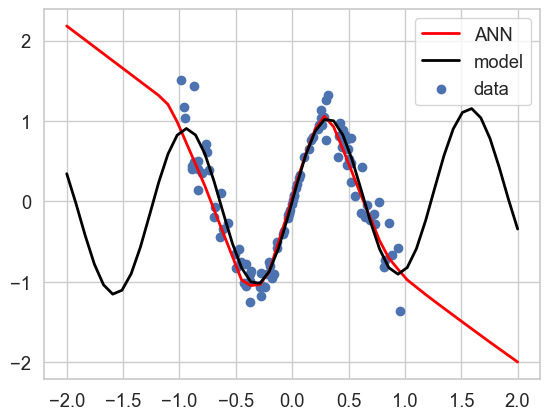

In [31]:
x_plot_large = np.linspace(-2, 2)
poly5 = poly[2][1]

plt.plot(x_plot_large, ann.predict(x_plot_large), color="red", label="ANN")
plt.plot(x_plot_large, model(x_plot_large), label="model", color="black")
plt.scatter(x, y, label="data")
plt.legend()

2/2 [==============================] - 0s 979us/step


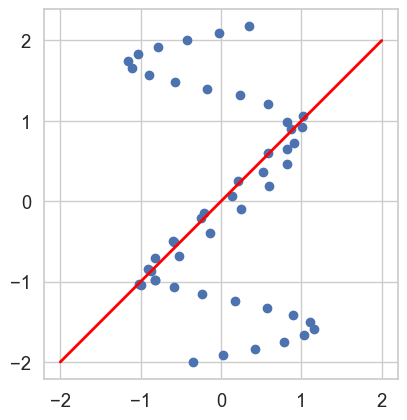

In [32]:
y_predict = ann.predict(x_plot_large)
plt.scatter(model(x_plot_large), y_predict)
plt.plot([-2, 2], [-2, 2], color="red")
plt.gca().set_aspect('equal', adjustable='box')

## What about errors? Can we capture the uncertainties in the data?

### Let's add a probabilistic layer

We will first start with a 1D Gaussian distribution from tensorflow probability: `IndependentNormal`

In [33]:
ann = tfk.Sequential(
    [
        tfkl.Input((1,)),
        tfkl.Dense(30, activation="relu"),
        tfkl.Dense(20, activation="relu"),
        tfkl.Dense(10, activation="relu"),
        tfkl.Dense(5, activation="relu"),
        tfkl.Dense(tfpl.IndependentNormal.params_size(1), activation=None),
        tfpl.IndependentNormal(1, tfd.Normal.sample),
    ]
)

In [34]:
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                60        
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 2)                 12        
                                                                 
 independent_normal (Indepe  ((None, 1),               0         
 ndentNormal)                 (None, 1))                         
                                                      

Wow! What's that? We are transforming our model into a probabilsiitc model. Our model now predicts a Gaussian pdf at every point. 

We are going to learn the mean and the standard deviation of the pdf as a function of x. 

That way, we let the model capture not only the mean but also the uncertainty.

So now, let's compile this model. Since the output of the network is now a distribution, we are going to maximize the likelihood, or minimize the negative log-likelihood.

In [35]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=negloglik)
history = ann.fit(x, y, batch_size=1, epochs=200, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

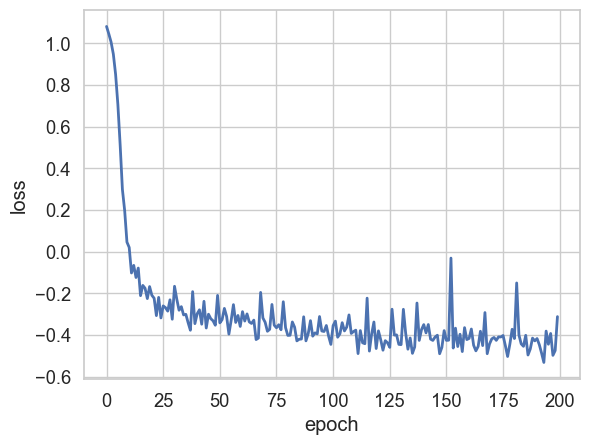

In [36]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

# Let's plot the results ...

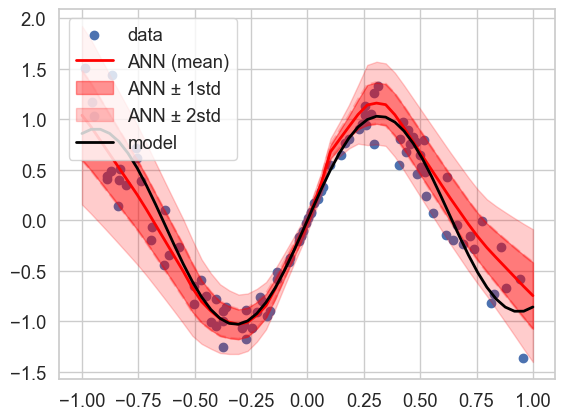

In [37]:
yp = np.squeeze(ann(x_plot).mean())
yp_std = np.squeeze(ann(x_plot).stddev())
plt.scatter(x, y, label="data")
plt.fill
plt.plot(x_plot, yp, color="red", label="ANN (mean)")
plt.plot(x_plot, yp + yp_std, color="red", ls="--", alpha=0.2)
plt.plot(x_plot, yp - yp_std, color="red", ls="--", alpha=0.2)
plt.fill_between(x_plot, yp - yp_std, yp + yp_std, label="ANN ± 1std", color="red", alpha=0.4)
plt.fill_between(x_plot, yp - 2*yp_std, yp + 2*yp_std, label="ANN ± 2std", color="red", alpha=0.2)
plt.plot(x_plot, model(x_plot), label="model", color="black")
plt.legend()

The model now captures that it is more uncertain towards the edges of the distribution...

### We now have a generative model for the data that captures the aleatoric uncertainty (from the data)

Let's generate new data points at random locations

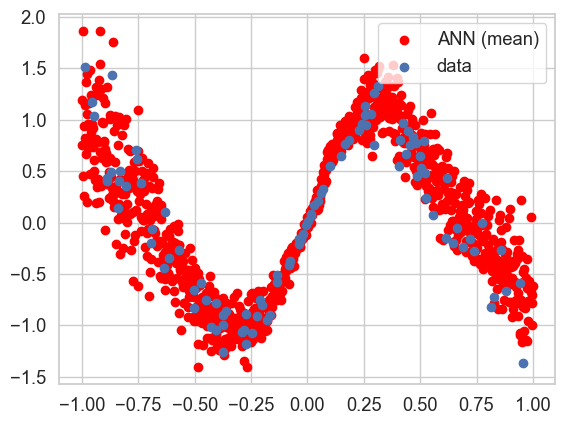

In [38]:
xp = np.linspace(-1, 1, 1000)
yp = ann(xp).sample()
yp_std = ann(xp).stddev()
plt.scatter(xp, yp, color="red", label="ANN (mean)")
plt.scatter(x, y, label="data")
plt.legend()

### We can explore the epistemic uncertainty (from the model itself)

In [39]:
def create_model():
    return tfk.Sequential(
        [
            tfkl.Input((1,)),
            tfkl.Dense(30, activation="relu"),
            tfkl.Dense(20, activation="relu"),
            tfkl.Dense(10, activation="relu"),
            tfkl.Dense(5, activation="relu"),
            tfkl.Dense(tfpl.IndependentNormal.params_size(1), activation=None),
            tfpl.IndependentNormal(1, tfd.Normal.sample),
        ]
    )

N = 5
ensembles = []
for i in range(N):
    new_ann = create_model()
    new_ann.compile(optimizer=tf.optimizers.legacy.Adam(learning_rate=0.001), loss=negloglik)
    new_ann.fit(x, y, batch_size=1, epochs=150, verbose=0)
    ensembles.append(new_ann)

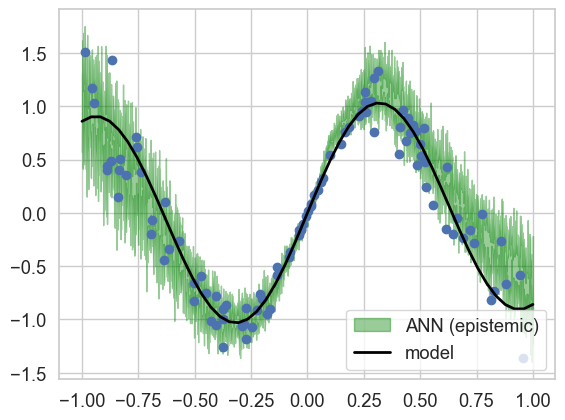

In [40]:
xp = np.linspace(-1, 1, 2000)
yp = ensembles[0](xp).mean()
yp_std = ensembles[0](xp).stddev()

yp_list = []
for i in range(N):
    yp_s = ensembles[i](xp).sample()
    yp_list.append(yp_s)

mu_all = np.mean(np.array(yp_list), axis=0).ravel()
sigma_all = np.std(np.array(yp_list), axis=0).ravel()

plt.fill_between(xp, mu_all - sigma_all, mu_all + sigma_all, label="ANN (epistemic)", color="green", alpha=0.4)
plt.scatter(x, y)
plt.plot(x_plot, model(x_plot), label="model", color="black")
plt.legend()

### Putting it altogether

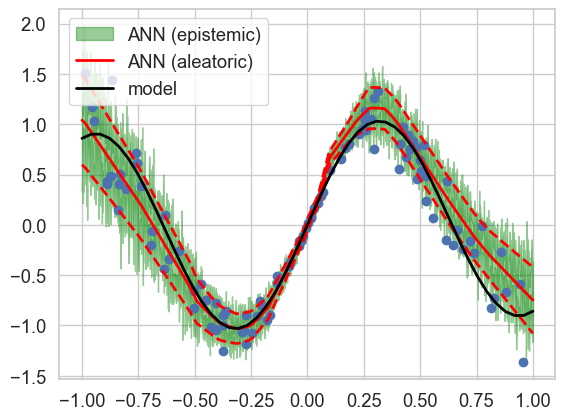

In [41]:
xp = np.linspace(-1, 1, 2000)
yp = ensembles[0](xp).mean()
yp_std = ensembles[0](xp).stddev()

yp_list = []
for i in range(N):
    yp_s = ensembles[i](xp).sample()
    yp_list.append(yp_s)

mu_all = np.mean(np.array(yp_list), axis=0).ravel()
sigma_all = np.std(np.array(yp_list), axis=0).ravel()

plt.fill_between(xp, mu_all - sigma_all, mu_all + sigma_all, label="ANN (epistemic)", color="green", alpha=0.4)
plt.plot(xp, yp, color="red", label="ANN (aleatoric)")
plt.plot(xp, yp + yp_std, color="red", ls="--")
plt.plot(xp, yp - yp_std, color="red", ls="--")
plt.scatter(x, y)
plt.plot(x_plot, model(x_plot), label="model", color="black")
plt.legend()

## Beyond Gaussian Posteriors ...

The posterior distribution $p_w(y|x)$ is not always well described by a Gaussian

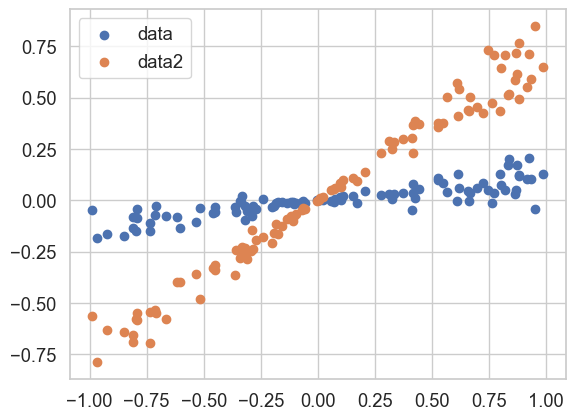

In [42]:
x = np.random.uniform(-1, 1, 100)
y1 = 0.1 * x + np.random.normal(0, 0.025, 100) * 3 * x
y2 = 0.75 * x + np.random.normal(0, 0.025, 100) * 5 * x
plt.scatter(x, y1, label="data")
plt.scatter(x, y2, label="data2")
plt.legend()
plt.show()

xbig = np.concatenate((x, x))
ybig = np.concatenate((y1, y2))

In [43]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
ann = create_model()
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=negloglik)
history = ann.fit(xbig, ybig, batch_size=1, epochs=200, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

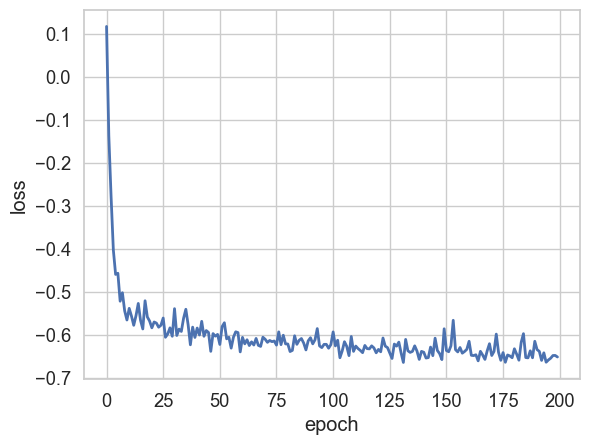

In [44]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

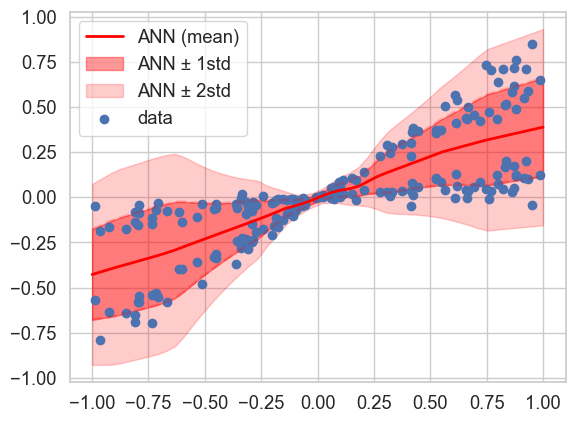

In [45]:
yp = np.squeeze(ann(x_plot).mean())
yp_std = np.squeeze(ann(x_plot).stddev())

plt.plot(x_plot, yp, color="red", label="ANN (mean)")
plt.plot(x_plot, yp + yp_std, color="red", ls="--", alpha=0.2)
plt.plot(x_plot, yp - yp_std, color="red", ls="--", alpha=0.2)
plt.fill_between(x_plot, yp - yp_std, yp + yp_std, label="ANN ± 1std", color="red", alpha=0.4)
plt.fill_between(x_plot, yp - 2*yp_std, yp + 2*yp_std, label="ANN ± 2std", color="red", alpha=0.2)
plt.scatter(xbig, ybig, label="data")
plt.legend()


The mean of the Gaussian does not describe my data well

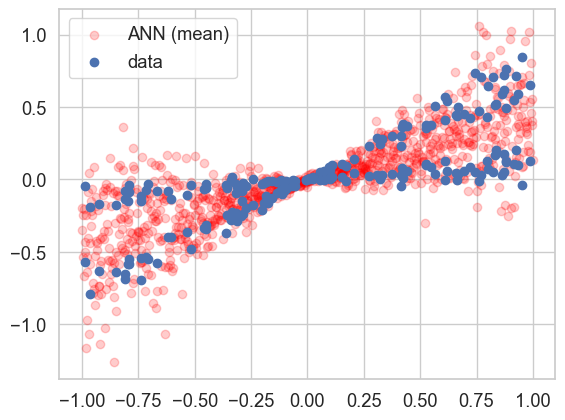

In [46]:
xp = np.linspace(-1, 1, 1000)
yp = ann(xp).sample()
yp_std = ann(xp).stddev()
plt.scatter(xp, yp, color="red", label="ANN (mean)", alpha=0.2)
plt.scatter(xbig, ybig, label="data")
plt.legend()

Let's try with a different posterior distribution

In [47]:
gmm = tfk.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(1, 1)),
        tfkl.Dense(30, activation="relu"),
        tfkl.Dense(20, activation="relu"),
        tfkl.Dense(10, activation="relu"),
        tfkl.Dense(5, activation="relu"),
        tfkl.Dense(tfpl.MixtureNormal.params_size(2, 1), activation=None),
        tfpl.MixtureNormal(2, 1),
    ]
)

In [48]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
gmm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=negloglik)
history = gmm.fit(xbig, ybig, batch_size=1, epochs=400, verbose=0)

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

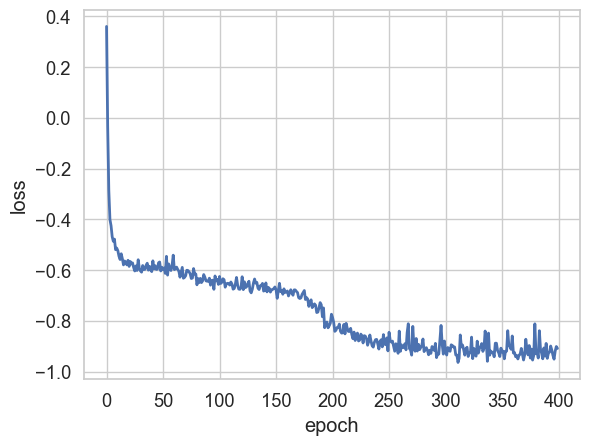

In [49]:
plt.plot(history.epoch, history.history["loss"])
plt.xlabel("epoch"), plt.ylabel("loss")

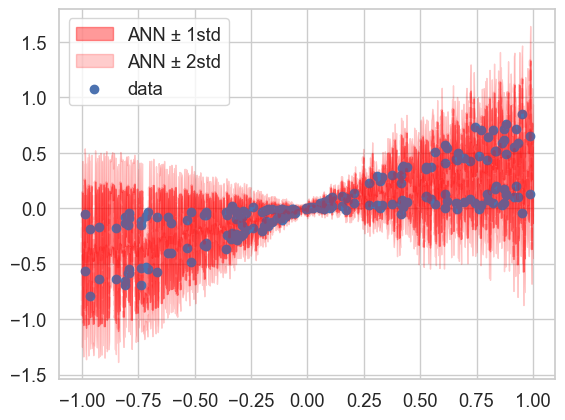

In [50]:
xp = np.linspace(-1, 1, 1000)
yp = np.squeeze(gmm(xp).sample())
yp_std = np.squeeze(gmm(xp).stddev())
# plt.scatter(xp, yp, marker="+", color="red", label="ANN (mean)", alpha=0.2)
plt.plot(xp, yp + yp_std, color="red", ls="--", alpha=0.2)
plt.plot(xp, yp - yp_std, color="red", ls="--", alpha=0.2)
plt.fill_between(xp, yp - yp_std, yp + yp_std, label="ANN ± 1std", color="red", alpha=0.4)
plt.fill_between(xp, yp - 2*yp_std, yp + 2*yp_std, label="ANN ± 2std", color="red", alpha=0.2)
plt.scatter(xbig, ybig, label="data")
plt.legend()

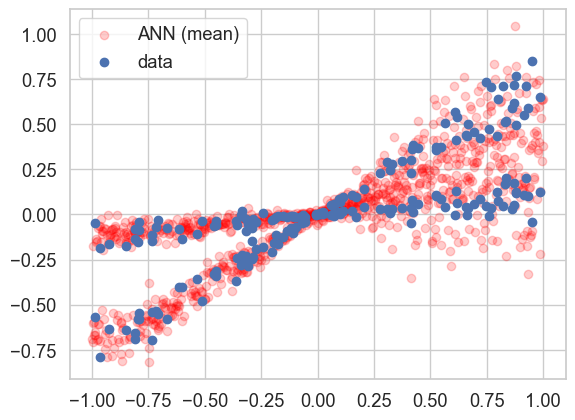

In [51]:
xp = np.linspace(-1, 1, 1000)
yp = gmm(xp).sample()
yp_std = gmm(xp).stddev()
plt.scatter(xp, yp, color="red", label="ANN (mean)", alpha=0.2)
plt.scatter(xbig, ybig, label="data")
plt.legend()